In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import json
from pandas import json_normalize
import numpy as np
import math
import datetime
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
#Data preparation
if False:
  import os

  ImageFileLocation = '/content/drive/MyDrive/Esen/test'

  def readTrainData(ImageFileLocation):
      files = [ImageFileLocation+"/"+i for i in os.listdir(ImageFileLocation)]
      return files

  allFiles = readTrainData(ImageFileLocation)

  columns = pd.read_json(allFiles[1]).columns
  df0 = pd.DataFrame(columns = columns)


  for f in allFiles:
    df = pd.read_json(f)
    df = df[columns]
    data = np.vstack([df0,df]) 
    df0 = pd.DataFrame(data, columns = columns)
    


  data_columns = []
  for col in df0.columns:
      data_columns.append(col)
      

  dataset = pd.DataFrame(df0, columns = data_columns)

  from pathlib import Path  
  filepath = Path('/content/drive/MyDrive/Esen/dx_all.csv')  
  filepath.parent.mkdir(parents=True, exist_ok=True)  
  dataset.to_csv(filepath)  

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Esen/dx_all.csv')  

In [ ]:
dataset

,Unnamed: 0,Nr,Spotter,Frequency,DXCall,Time,Date,Beacon,MM,AM,...,Comment,Flag,Band,Mode,Continent_dx,Continent_spotter,DXLocator,LOTW,LOTW_Date,EQSL
0,0,48651895,IT9RZR,50313.00,LZ1ZL,07:35,2021-05-15,False,False,False,...,hrd in jm76,bg,6.0,DIGITAL,EU,EU,KN22MT,1.0,11/20/2020,NaN
1,1,48651894,ES5QA,14074.00,DG6YID,07:35,2021-05-15,False,False,False,...,KO38CS JO42,de,20.0,DIGITAL,EU,EU,JO51AA,NaN,NaN,NaN
2,2,48651893,EA2ARD,50313.00,LA4YGA,07:35,2021-05-15,False,False,False,...,IN93AH ES JO48BE FT-73,no,6.0,DIGITAL,EU,EU,JP50IA,1.0,05/08/2021,1.0
3,3,48651892,EA1AMX,7196.00,EA1FHQ,07:35,2021-05-15,False,False,False,...,EO-1266 DME-33076,es,40.0,LSB,EU,EU,IN80DJ,1.0,05/08/2021,1.0
4,4,48651891,R3OR,14017.38,UA9CTT,07:35,2021-05-15,False,False,False,...,CW UN DX Contest,ru,20.0,CW,AS,EU,MO05QD,1.0,03/15/2016,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745995,745995,48814312,YU1ZZ,14019.70,A71BX,05:36,2021-05-30,False,False,False,...,,qa,20.0,CW,AS,EU,LL55SH,1.0,07/02/2011,1.0
745996,745996,48814311,UA3MBJ,144360.00,YU7KB,05:36,2021-05-30,False,False,False,...,KO87QV MS JN94XX MSK144 +0 dB,rs,2.0,USB,EU,EU,KN04MA,NaN,NaN,NaN
745997,745997,48814310,N6GP,14028.30,JI1RXQ,05:36,2021-05-30,False,False,False,...,NaN,jp,20.0,CW,AS,NaN,PM96EJ,1.0,04/30/2021,1.0
745998,745998,48814309,DP4X,14029.70,UN0LM,05:36,2021-05-30,False,False,False,...,,kz,20.0,CW,AS,EU,MO51RE,NaN,NaN,NaN


In [ ]:
dataset.columns

Index(['Unnamed: 0', 'Nr', 'Spotter', 'Frequency', 'DXCall', 'Time', 'Date',
       'Beacon', 'MM', 'AM', 'Valid', 'DXHomecall', 'Comment', 'Flag', 'Band',
       'Mode', 'Continent_dx', 'Continent_spotter', 'DXLocator', 'LOTW',
       'LOTW_Date', 'EQSL'],
      dtype='object')

In [ ]:
dataset = dataset.drop(labels=['Nr', 'Spotter', 'LOTW', 'LOTW_Date', 'Continent_dx', 'Continent_spotter', 'DXLocator', 'EQSL', 'MM', 'AM'], axis=1)

display(dataset)

,Unnamed: 0,Frequency,DXCall,Time,Date,Beacon,Valid,DXHomecall,Comment,Flag,Band,Mode
0,0,50313.00,LZ1ZL,07:35,2021-05-15,False,True,LZ1ZL,hrd in jm76,bg,6.0,DIGITAL
1,1,14074.00,DG6YID,07:35,2021-05-15,False,True,DG6YID,KO38CS JO42,de,20.0,DIGITAL
2,2,50313.00,LA4YGA,07:35,2021-05-15,False,True,LA4YGA,IN93AH ES JO48BE FT-73,no,6.0,DIGITAL
3,3,7196.00,EA1FHQ,07:35,2021-05-15,False,True,EA1FHQ,EO-1266 DME-33076,es,40.0,LSB
4,4,14017.38,UA9CTT,07:35,2021-05-15,False,True,UA9CTT,CW UN DX Contest,ru,20.0,CW
...,...,...,...,...,...,...,...,...,...,...,...,...
745995,745995,14019.70,A71BX,05:36,2021-05-30,False,True,A71BX,,qa,20.0,CW
745996,745996,144360.00,YU7KB,05:36,2021-05-30,False,True,YU7KB,KO87QV MS JN94XX MSK144 +0 dB,rs,2.0,USB
745997,745997,14028.30,JI1RXQ,05:36,2021-05-30,False,True,JI1RXQ,NaN,jp,20.0,CW
745998,745998,14029.70,UN0LM,05:36,2021-05-30,False,True,UN0LM,,kz,20.0,CW


In [ ]:
dataset.isnull().values.any()

True

In [ ]:
time = {}
cntr = 0
for hour in range(24):
  for minute in range(60):
    if hour >= 10 and minute >= 10:
      time[str(hour)+':'+str(minute)] = cntr
    elif hour >= 10 and minute < 10:
      time[str(hour)+':0'+str(minute)] = cntr
    elif hour < 10 and minute >= 10:
      time['0'+str(hour)+':'+str(minute)] = cntr
    else:
      time['0'+str(hour)+':0'+str(minute)] = cntr
    cntr += 1


In [ ]:
time_arr = np.ndarray([len(dataset)])
cntr = 0
for i in dataset['Time']:
  time_arr[cntr] = time[i]
  cntr += 1
dataset['Time'] = time_arr

In [ ]:
dataset = dataset.dropna()

In [ ]:
#One-hot encoding of the "Beacon"
dataset['Beacon'] = dataset['Beacon'].astype('category')
dataset['Beacon'] = dataset['Beacon'].cat.codes

y = pd.get_dummies(dataset.Beacon, prefix='Beacon')
dataset['Beacon_0'] = y.Beacon_0
dataset['Beacon_1'] = y.Beacon_1

dataset = dataset.drop(columns = ['Beacon'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
#One-hot encoding of the "Valid"
dataset['Valid'] = dataset['Valid'].astype('category')
dataset['Valid'] = dataset['Valid'].cat.codes

y = pd.get_dummies(dataset.Valid, prefix='Valid')
dataset['Valid_0'] = y.Valid_0
dataset['Valid_1'] = y.Valid_1

dataset = dataset.drop(columns = ['Valid'])


In [ ]:
#One-hot encoding of the "Mode"
dataset['Mode'] = dataset['Mode'].astype('category')
dataset['Mode'] = dataset['Mode'].cat.codes

y = pd.get_dummies(dataset.Mode, prefix='Mode')
dataset['Mode_0'] = y.Mode_0
dataset['Mode_1'] = y.Mode_1
dataset['Mode_2'] = y.Mode_2
dataset['Mode_3'] = y.Mode_3

dataset = dataset.drop(columns = ['Mode'])

#dataset

In [ ]:
dataset = dataset[dataset.Frequency < 30000]

In [ ]:
dataset = dataset.drop(labels=['Unnamed: 0'], axis=1)

## Feature Engineering

## For Cyclical Features

In [ ]:
#Considering the time as a cyclical feature and make the appropirate adjustments accordingly

In [ ]:
def encode(data, col):
    max_val = max(data[col]) + 1
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/(max_val))
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/(max_val))
    return data

In [ ]:
dataset['Year'] = pd.to_datetime(dataset['Date']).dt.year
dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
dataset['Day'] = pd.to_datetime(dataset['Date']).dt.day

In [ ]:
dataset = encode(dataset, 'Time')

In [ ]:
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

In [ ]:
#dayofweek property of datetime enables the user to label the days as numbers (0:Monday to 6:Sunday) format should be YYYY-MM-DD
import datetime as dt
dataset['dayofweek'] = dataset['Date'].dt.dayofweek

In [ ]:
dataset = encode(dataset, 'dayofweek')

In [ ]:
dataset['dayofweek'].unique()

array([5, 4, 6, 0, 3, 2, 1])

In [ ]:
dataset['Label'] = 0

In [ ]:
#Splitting the train dataset to have a test dataset
train_stored, test_stored = train_test_split(
    dataset, test_size=0.2, random_state=1245)

In [ ]:
test_stored['Frequency'][:10680] = test_stored['Frequency'][:10680]*1.5
test_stored['Band'][:10680] = test_stored['Band'][:10680]*1.7
test_stored['Label'][:10680] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
#SHUFFLING
test_stored = test_stored.sample(frac = 1)

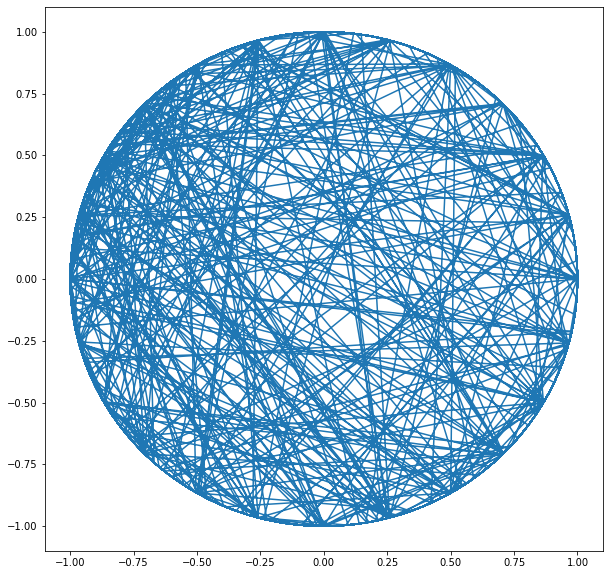

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(dataset['Time_sin'],dataset['Time_cos'])

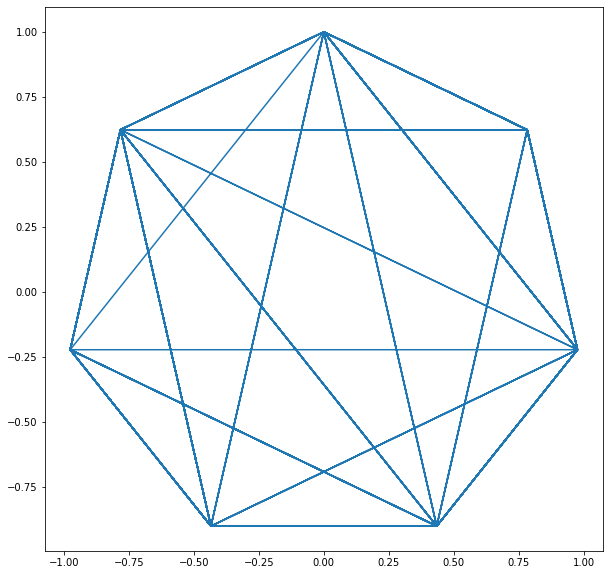

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(dataset['dayofweek_sin'],dataset['dayofweek_cos'])

In [ ]:
print(np.sin(2 * np.pi * 0/(1440)))
print(np.cos(2 * np.pi * 0/(1440)))

0.0
1.0


In [ ]:
print(np.sin(2 * np.pi * 1/(1440)))
print(np.cos(2 * np.pi * 1/(1440)))

0.004363309284746571
0.9999904807207345


In [ ]:
print(np.sin(2 * np.pi * 1439/(1440)))
print(np.cos(2 * np.pi * 1439/(1440)))

-0.004363309284747432
0.9999904807207345


In [ ]:
#Fit-transforming the datasets, first fitting with respect to the train dataset than transforming all datasets (and scaling them)
from sklearn.preprocessing import MinMaxScaler
selected = ['Frequency', 'Band']
mmScaler = MinMaxScaler((-1,1))

mmScaler.fit(np.array(train_stored[selected]))
train_stored[selected] = mmScaler.transform(np.array(train_stored[selected]))
test_stored[selected] = mmScaler.transform(np.array(test_stored[selected]))

In [ ]:

#Choosing the columns to use during training
selected = ['Frequency', 'Band', 'Time_sin','Time_cos', 'Mode_0',	'Mode_1', 'Mode_2',	'Mode_3', 'Beacon_0',	'Beacon_1',	'Valid_0',	'Valid_1', 'dayofweek_sin', 'dayofweek_cos']
selected2 = ['Label']

train_x = train_stored[selected]
train_y = train_stored[selected2]
test_x = test_stored[selected]
test_y = test_stored[selected2]

In [ ]:
test_x

,Frequency,Band,Time_sin,Time_cos,Mode_0,Mode_1,Mode_2,Mode_3,Beacon_0,Beacon_1,Valid_0,Valid_1,dayofweek_sin,dayofweek_cos
3873,-0.111151,-0.866667,-0.945519,0.325568,0,0,0,1,1,0,0,1,-0.433884,-0.900969
88600,-0.404518,-0.733333,-0.665882,0.746057,1,0,0,0,1,0,0,1,-0.781831,0.623490
157365,-0.119828,-0.866667,0.688355,0.725374,0,1,0,0,1,0,0,1,0.781831,0.623490
475503,0.911796,-1.000000,-0.722364,-0.691513,0,0,0,1,1,0,1,0,0.781831,0.623490
293842,-0.997132,1.000000,-0.681998,0.731354,0,1,0,0,1,0,0,1,-0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612112,-0.124390,-0.866667,-0.573576,0.819152,1,0,0,0,1,0,0,1,-0.433884,-0.900969
48742,0.881449,-1.000000,0.469472,-0.882948,1,0,0,0,1,0,0,1,-0.781831,0.623490
93036,0.911510,-1.000000,-0.642788,0.766044,0,0,0,1,1,0,0,1,0.974928,-0.222521
90000,-0.119749,-0.866667,0.965926,0.258819,0,1,0,0,1,0,0,1,0.000000,1.000000


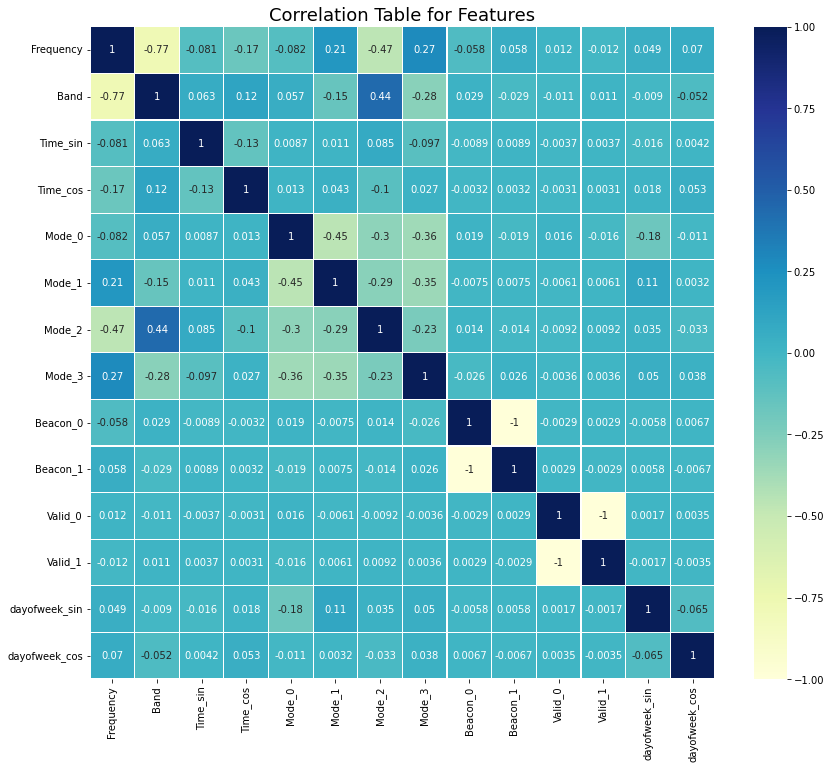

In [ ]:
#Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))
plt.title('Correlation Table for Features', fontdict={'fontsize':18})
ax = sns.heatmap(train_x.corr(), cmap="YlGnBu", annot=True, linewidths=.2)


In [ ]:
  from pathlib import Path  
  filepath1 = Path('/content/drive/MyDrive/Esen/test_x.csv')  
  filepath1.parent.mkdir(parents=True, exist_ok=True)  
  test_x.to_csv(filepath1) 

  filepath2 = Path('/content/drive/MyDrive/Esen/test_y.csv')  
  filepath2.parent.mkdir(parents=True, exist_ok=True)  
  test_y.to_csv(filepath2)

  filepath3 = Path('/content/drive/MyDrive/Esen/train_x.csv')  
  filepath3.parent.mkdir(parents=True, exist_ok=True)  
  train_x.to_csv(filepath3)  

  filepath4 = Path('/content/drive/MyDrive/Esen/train_y.csv')  
  filepath4.parent.mkdir(parents=True, exist_ok=True)  
  train_y.to_csv(filepath4) 

In [ ]:
import pandas as pd
test_x = pd.read_csv('/content/drive/MyDrive/Esen/test_x.csv') 
test_x = test_x.drop(columns=['Unnamed: 0']) 
test_y = pd.read_csv('/content/drive/MyDrive/Esen/test_y.csv')  
test_y = test_y.drop(columns=['Unnamed: 0']) 
train_x = pd.read_csv('/content/drive/MyDrive/Esen/train_x.csv')  
train_x = train_x.drop(columns=['Unnamed: 0']) 
train_y = pd.read_csv('/content/drive/MyDrive/Esen/train_y.csv')  
train_y = train_y.drop(columns=['Unnamed: 0']) 

# **Algorithms below and their resulting performances are compared with each other**

---

1- AutoEncoder

---


2- Local Outlier Factor

---


3- Histogram-Based Outlier Score

---


4- Isolation Forest

---


5- Kernel Density Estimation


# **Auto Encoder**

In [ ]:
# Determine the sizes
nb_epoch = 50
batch_size = 64
input_dim = train_x.shape[1] #num of columns, 30
encoding_dim = 128
hidden_dim_1 = 96
hidden_dim_2 = 64
hidden_dim_3 = 32
hidden_dim_4 = 16
latent_dim = 4
learning_rate = 0.001

In [ ]:
# Forming the neural network
# Input Layer
activation = "tanh"
init = tf.keras.initializers.GlorotNormal()
input_layer = tf.keras.layers.Input(shape=(input_dim, ))
# Encoder
encoder = tf.keras.layers.Dense(encoding_dim,kernel_initializer=init)(input_layer) #encoding_dim = 12
encoder = tf.keras.layers.LeakyReLU(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, kernel_initializer=init)(encoder) #hidden_dim_1 = 64
encoder = tf.keras.layers.LeakyReLU(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, kernel_initializer=init)(encoder) #hidden_dim_2 = 32
encoder = tf.keras.layers.LeakyReLU(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_3, kernel_initializer=init)(encoder) #hidden_dim_2 = 32
encoder = tf.keras.layers.LeakyReLU(0.2)(encoder)
# Latent Space
latent = tf.keras.layers.Dense(latent_dim,kernel_initializer=init)(encoder) #latent_dim = 4
latent = tf.keras.layers.LeakyReLU(0.2)(latent)

# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_3, kernel_initializer=init)(latent) #hidden_dim_2 = 32
decoder = tf.keras.layers.LeakyReLU(0.2)(decoder)
decoder = tf.keras.layers.Dense(hidden_dim_2, kernel_initializer=init)(decoder) #hidden_dim_1 = 64
decoder = tf.keras.layers.LeakyReLU(0.2)(decoder)
decoder = tf.keras.layers.Dense(hidden_dim_1, kernel_initializer=init)(decoder) #hidden_dim_1 = 64
decoder = tf.keras.layers.LeakyReLU(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, kernel_initializer=init, activation=activation)(decoder) #encoding_dim = 128
decoder=tf.keras.layers.Dropout(0.2)(decoder)
output = tf.keras.layers.Dense(input_dim, activation=activation)(decoder) #30
# Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=output)
autoencoder.summary()
# LatentNet
bottlenecNet = tf.keras.Model(inputs=input_layer, outputs=latent)
bottlenecNet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14)]              0         
                                                                 
 dense (Dense)               (None, 128)               1920      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 96)                12384     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 96)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                6208      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0     

In [ ]:
# Callback
cp = tf.keras.callbacks.ModelCheckpoint(filepath="dx.h5",
                               mode='min', monitor='val_loss', verbose=2, save_best_only=True)
# Define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True )

lRcheduling = tf.keras.callbacks.ReduceLROnPlateau(
    #validation loss'a göre learning rate 'i değiştiriyor, total loss olarak istersek monitor="loss" demeliyiz
    monitor='val_loss',
    factor=0.95,
    patience=3,
    verbose=0,
    mode='auto',
    min_lr=0.000001)

In [ ]:
autoencoder.compile(loss='mean_squared_error',
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [ ]:
# Continuing from where it left off from the previous training (True), if you change the network, loadSaveData = False
loadSaveData = False
if loadSaveData:
  autoencoder.load_weights("dx.h5")

In [ ]:
#Training the model 
history = autoencoder.fit(train_x, train_x,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(test_x, test_x))

Epoch 1/50
1528/1528 [==============================] - 9s 4ms/step - loss: 0.0338 - val_loss: 0.0074
Epoch 2/50
1528/1528 [==============================] - 6s 4ms/step - loss: 0.0053 - val_loss: 0.0046
Epoch 3/50
1528/1528 [==============================] - 6s 4ms/step - loss: 0.0032 - val_loss: 0.0040
Epoch 4/50
1528/1528 [==============================] - 9s 6ms/step - loss: 0.0023 - val_loss: 0.0037
Epoch 5/50
1528/1528 [==============================] - 6s 4ms/step - loss: 0.0019 - val_loss: 0.0032
Epoch 6/50
1528/1528 [==============================] - 6s 4ms/step - loss: 0.0017 - val_loss: 0.0041
Epoch 7/50
1528/1528 [==============================] - 6s 4ms/step - loss: 0.0016 - val_loss: 0.0038
Epoch 8/50
1528/1528 [==============================] - 6s 4ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 9/50
1528/1528 [==============================] - 6s 4ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 10/50
1528/1528 [==============================] - 6s 4ms/step - loss: 0.001

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

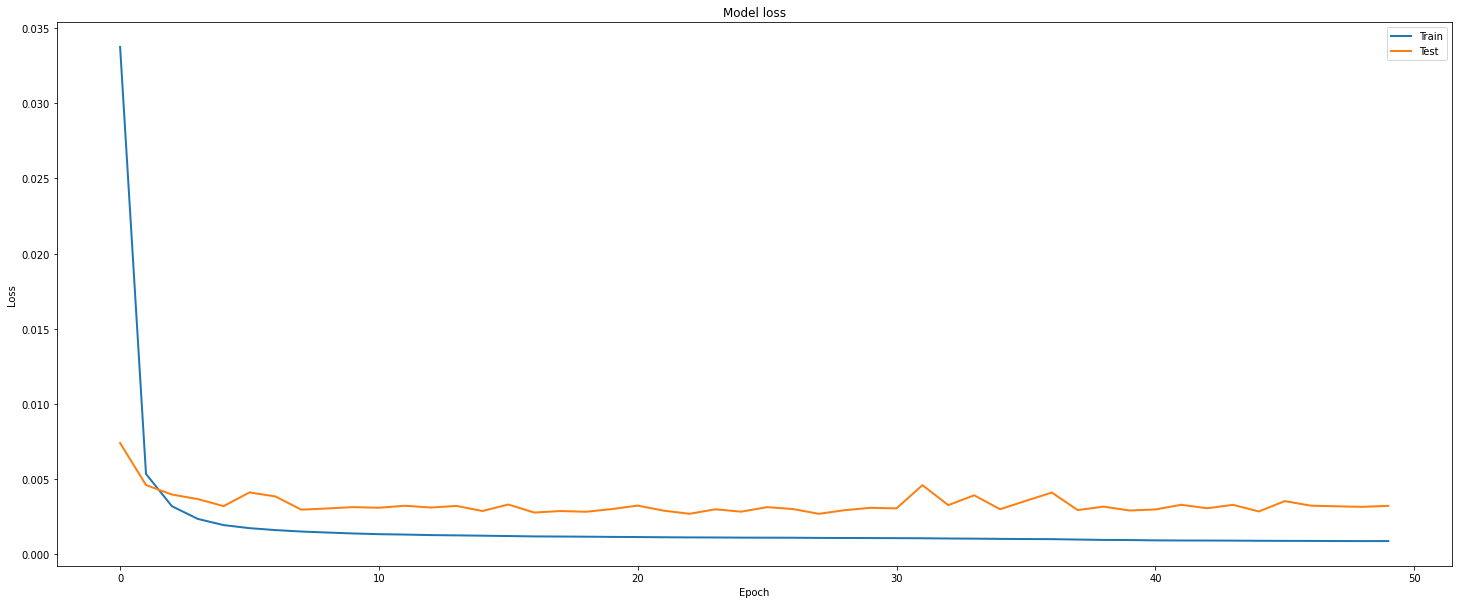

In [ ]:
# Plot history loss to observe the convergence 
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'], linewidth=2, label='Train')
plt.plot(history.history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch'),
display(plt.plot)

In [ ]:
# Predicting for training data and calculating the error
prediction = autoencoder.predict(train_x)
error = tf.reduce_mean(tf.math.subtract(prediction,train_x),1)

In [ ]:
# Mean and standard deviation of Error
print("Mean of error is",np.mean(error))
print("Standard deviation of error is", np.std(error))

Mean of error is 0.0026333765
Standard deviation of error is 0.004064774


In [ ]:
# Defining the measures for outlier_lines to detect the thresholds
outlier_line1 = np.mean(error)+3*np.std(error)
outlier_line2 = np.mean(error)-3*np.std(error)

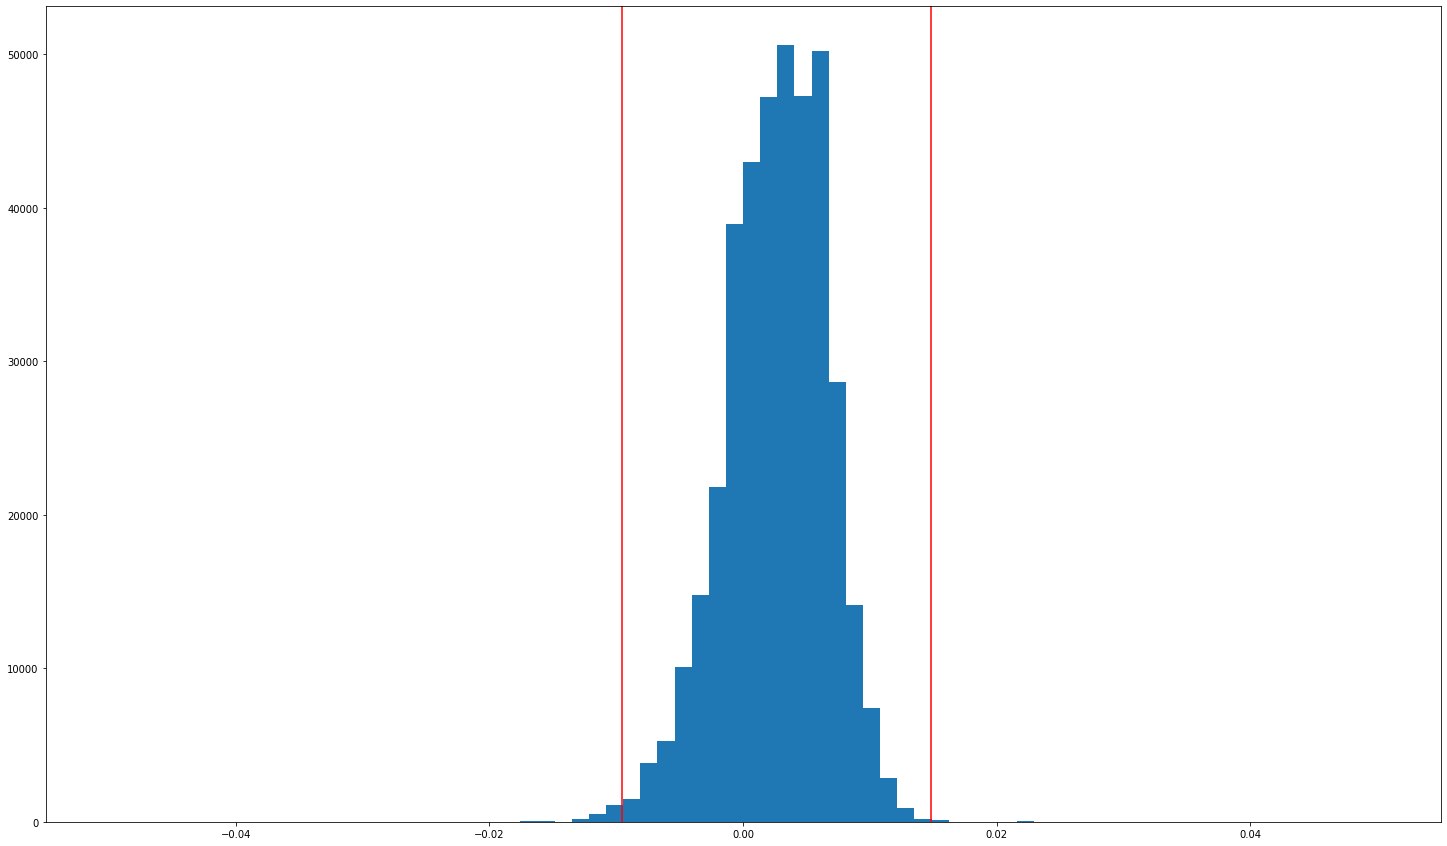

In [ ]:
# Plots for tranining MSE
fig = plt.figure(figsize=(15,10))
bins = np.linspace(-0.05,0.05,75)
plt.hist(error,bins=bins)
plt.axvline(outlier_line1,color='r')
plt.axvline(outlier_line2,color='r')

In [ ]:
# Prediction with training and test data using the autoencoder as model 
test_prediction = autoencoder.predict(test_x)
test_error = tf.reduce_mean(tf.math.subtract(test_prediction,test_x),1)

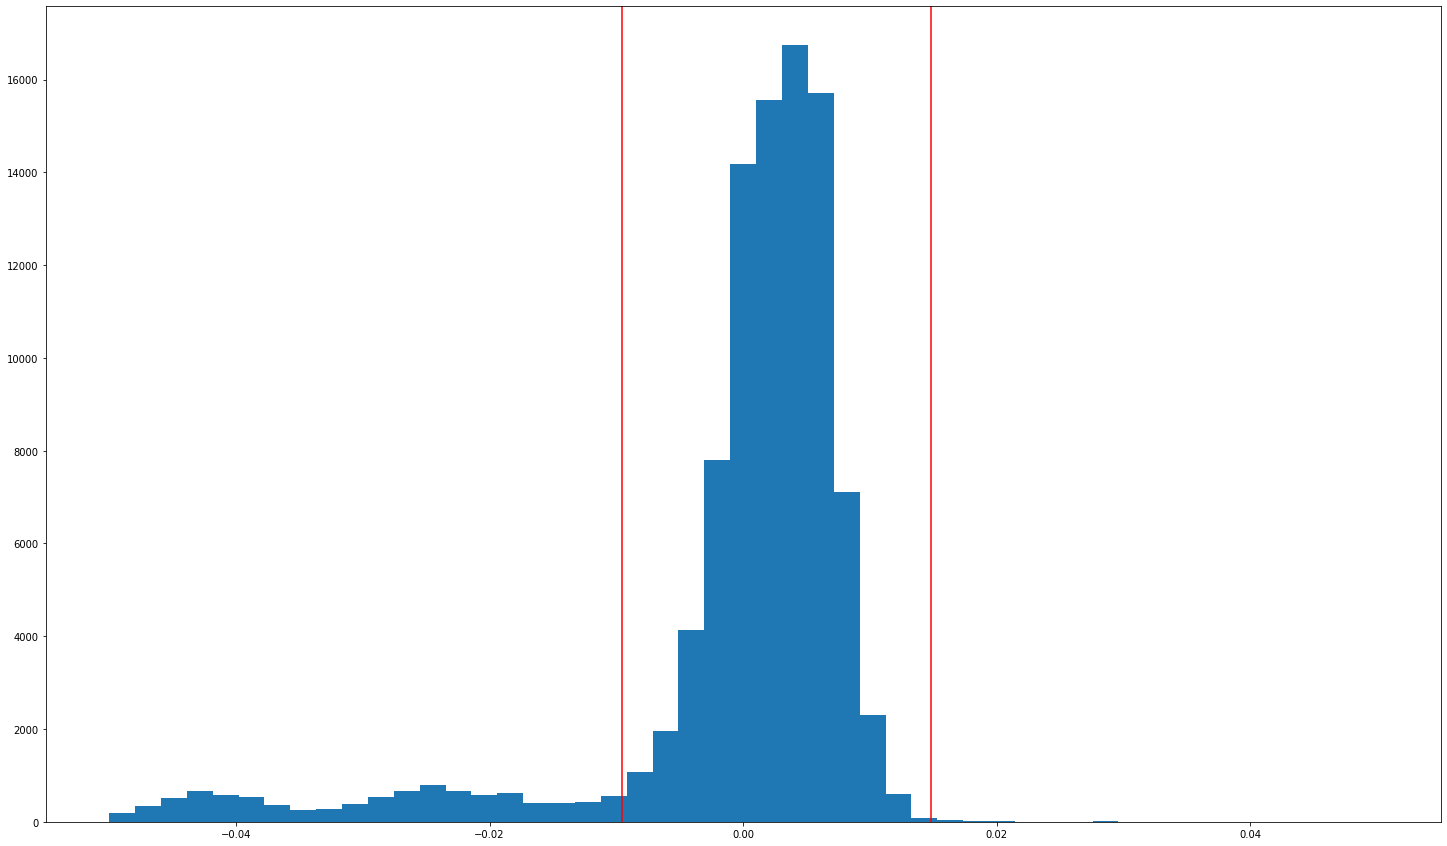

In [ ]:
# Plotting the histogram for test MSE
fig = plt.figure(figsize=(15,10))
bins = np.linspace(-0.05,0.05,50)
plt.hist(test_error,bins=bins)
plt.axvline(outlier_line1,color='r')
plt.axvline(outlier_line2,color='r')

In [ ]:
#To determine the indexes of anomaly data within test dataset
indexes = []
for i in range (len(test_error)):
  if test_error[i] > outlier_line1 or test_error[i] < outlier_line2:
    indexes.append(i)


In [ ]:
prediction_labels = np.zeros(97735)
for i in indexes:
  prediction_labels[i] = 1
np.unique(prediction_labels)

array([0., 1.])

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("Classification report for AutoEncoder: \n", classification_report(test_y, prediction_labels, target_names=target_names))

Classification report for AutoEncoder: 
               precision    recall  f1-score   support

     class 0       0.99      0.99      0.99     87055
     class 1       0.96      0.93      0.94     10680

    accuracy                           0.99     97735
   macro avg       0.97      0.96      0.97     97735
weighted avg       0.99      0.99      0.99     97735



In [ ]:
!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 31.4 MB/s 


In [ ]:
import shap
import numpy as np

#IMPORTANT: Change the autoencoder model while running this cell. Use ReLU's instead of LeakyReLU's. 

# select a set of background examples to take an expectation over
choices = np.random.choice(train_x.shape[0], 100, replace=False)
columns = train_x.columns
background = pd.DataFrame()

for col in columns:
  lst = []
  for i in choices:
    lst.append(float(train_x[col][i:i+1]))
  background[col] = lst

background_arr = background.to_numpy()

# explain predictions of the model on four images
e = shap.DeepExplainer(autoencoder, background_arr)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
test_arr = test_x.to_numpy()
shap_values = e.shap_values(test_arr[:100])

#shap.plots.bar(shap_values)

In [ ]:
shap.summary_plot(shap_values,test_x[:100])

In [ ]:
test_x2 = test_x.drop(labels = ['Valid_0','Valid_1', 'Beacon_0', 'Beacon_1'], axis=1)
train_x2 = train_x.drop(labels = ['Valid_0','Valid_1', 'Beacon_0', 'Beacon_1'], axis=1)

Applying feature importance and dropping some columns, the following are the results of the updated dataset

In [ ]:
input_dim = 10
# Forming the neural network
# Input Layer
activation = "tanh"
init = tf.keras.initializers.GlorotNormal()
input_layer = tf.keras.layers.Input(shape=(input_dim, ))
# Encoder
encoder = tf.keras.layers.Dense(encoding_dim,kernel_initializer=init)(input_layer) #encoding_dim = 12
encoder = tf.keras.layers.LeakyReLU(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, kernel_initializer=init)(encoder) #hidden_dim_1 = 64
encoder = tf.keras.layers.LeakyReLU(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, kernel_initializer=init)(encoder) #hidden_dim_2 = 32
encoder = tf.keras.layers.LeakyReLU(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_3, kernel_initializer=init)(encoder) #hidden_dim_2 = 32
encoder = tf.keras.layers.LeakyReLU(0.2)(encoder)
# Latent Space
latent = tf.keras.layers.Dense(latent_dim,kernel_initializer=init)(encoder) #latent_dim = 4
latent = tf.keras.layers.LeakyReLU(0.2)(latent)

# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_3, kernel_initializer=init)(latent) #hidden_dim_2 = 32
decoder = tf.keras.layers.LeakyReLU(0.2)(decoder)
decoder = tf.keras.layers.Dense(hidden_dim_2, kernel_initializer=init)(decoder) #hidden_dim_1 = 64
decoder = tf.keras.layers.LeakyReLU(0.2)(decoder)
decoder = tf.keras.layers.Dense(hidden_dim_1, kernel_initializer=init)(decoder) #hidden_dim_1 = 64
decoder = tf.keras.layers.LeakyReLU(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, kernel_initializer=init, activation=activation)(decoder) #encoding_dim = 128
decoder=tf.keras.layers.Dropout(0.2)(decoder)
output = tf.keras.layers.Dense(input_dim, activation=activation)(decoder) #30
# Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=output)
autoencoder.summary()
# LatentNet
bottlenecNet = tf.keras.Model(inputs=input_layer, outputs=latent)
bottlenecNet.summary()

In [ ]:
autoencoder.compile(loss='mean_squared_error',
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [ ]:
#Training the model 
history = autoencoder.fit(train_x2, train_x2,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(test_x2, test_x2))

In [ ]:
# Predicting for training data and calculating the error
prediction = autoencoder.predict(train_x2)
error = tf.reduce_mean(tf.math.subtract(prediction,train_x2),1)

In [ ]:
# Defining the measures for outlier_lines to detect the thresholds
outlier_line1 = np.mean(error)+3*np.std(error)
outlier_line2 = np.mean(error)-3*np.std(error)

In [ ]:
# Prediction with training and test data using the autoencoder as model 
test_prediction = autoencoder.predict(test_x2)
test_error = tf.reduce_mean(tf.math.subtract(test_prediction,test_x2),1)

In [ ]:
#To determine the indexes of anomaly data within test dataset
indexes2 = []
for i in range (len(test_error)):
  if test_error[i] > outlier_line1 or test_error[i] < outlier_line2:
    indexes2.append(i)

In [ ]:
prediction_labels = np.zeros(97735)
for i in indexes2:
  prediction_labels[i] = 1
np.unique(prediction_labels)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("Classification report for AutoEncoder trained with the updated dataset: \n", classification_report(test_y, prediction_labels, target_names=target_names))

# **Local Outlier Factor**

In [ ]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 134 kB 31.0 MB/s 
  Created wheel for pyod: filename=pyod-1.0.4-py3-none-any.whl size=165073 sha256=8984ee9c97b5c769b1bed8fc8a33f0e84d591b53ea24df27012684e4e3cfe844
  Stored in directory: /root/.cache/pip/wheels/3d/48/a8/87d61660791c7e6b0f5c3068da7fb17ade7fdc041e864fe053
Successfully built pyod


In [ ]:
from __future__ import division
from __future__ import print_function
from sklearn.metrics import classification_report

import os
import sys

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

from pyod.models.lof import LOF


if __name__ == "__main__":

    # train LOF detector
    clf_name = 'LOF'
    clf = LOF()
    lof = clf.fit(train_x)

    # get the prediction labels and outlier scores of the training data
    y_train_pred_lof = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores_lof = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred_lof = clf.predict(test_x)  # outlier labels (0 or 1)
    y_test_scores_lof = clf.decision_function(test_x)  # outlier scores

In [ ]:
target_names = ['class 0', 'class 1']
print("Classification report for LOF: \n", classification_report(test_y, y_test_pred_lof, target_names=target_names))

Classification report for LOF: 
               precision    recall  f1-score   support

     class 0       1.00      0.90      0.94     87055
     class 1       0.54      0.98      0.70     10680

    accuracy                           0.91     97735
   macro avg       0.77      0.94      0.82     97735
weighted avg       0.95      0.91      0.92     97735



Applying feature importance and dropping some columns, the following are the results of the updated dataset

In [ ]:
if __name__ == "__main__":

    # train LOF detector
    clf_name = 'LOF'
    clf = LOF()
    lof = clf.fit(train_x2)

    # get the prediction labels and outlier scores of the training data
    y_train_pred_lof = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores_lof = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred_lof = clf.predict(test_x2)  # outlier labels (0 or 1)
    y_test_scores_lof = clf.decision_function(test_x2)  # outlier scores

In [ ]:
target_names = ['class 0', 'class 1']
print("Classification report for LOF trained with the updates dataset: \n", classification_report(test_y, y_test_pred_lof, target_names=target_names))

Classification report for LOF trained with the updates dataset: 
               precision    recall  f1-score   support

     class 0       1.00      0.90      0.95     87055
     class 1       0.55      0.99      0.70     10680

    accuracy                           0.91     97735
   macro avg       0.77      0.94      0.82     97735
weighted avg       0.95      0.91      0.92     97735



 
 
# **Histogram-based Outlier Score**

In [ ]:
from pyod.models.hbos import HBOS
from sklearn.metrics import accuracy_score

if __name__ == "__main__":
    # train HBOS detector
    clf_name = 'HBOS'
    clf = HBOS()
    clf.fit(train_x)

    # get the prediction labels and outlier scores of the training data
    y_train_pred_hbos = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores_hbos = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred_hbos = clf.predict(test_x)  # outlier labels (0 or 1)
    y_test_scores_hbos = clf.decision_function(test_x)  # outlier scores
    


In [ ]:
target_names = ['class 0', 'class 1']
print("Classification report for HBOS: \n", classification_report(test_y, y_test_pred_hbos, target_names=target_names))

Classification report for HBOS: 
               precision    recall  f1-score   support

     class 0       0.94      0.90      0.92     87055
     class 1       0.41      0.57      0.48     10680

    accuracy                           0.86     97735
   macro avg       0.68      0.73      0.70     97735
weighted avg       0.89      0.86      0.87     97735



Applying feature importance and dropping some columns, the following are the results of the updated dataset

In [ ]:
if __name__ == "__main__":
    # train HBOS detector
    clf_name = 'HBOS'
    clf = HBOS()
    clf.fit(train_x2)

    # get the prediction labels and outlier scores of the training data
    y_train_pred_hbos = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores_hbos = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred_hbos = clf.predict(test_x2)  # outlier labels (0 or 1)
    y_test_scores_hbos = clf.decision_function(test_x2)  # outlier scores

In [ ]:
target_names = ['class 0', 'class 1']
print("Classification report for HBOS: \n", classification_report(test_y, y_test_pred_hbos, target_names=target_names))

# **Isolation Forest**

In [ ]:
from pyod.models.iforest import IForest
from sklearn.metrics import accuracy_score

if __name__ == "__main__":
    # train IForest detector
    clf_name = 'IForest'
    clf = IForest()
    clf.fit(train_x)

    # get the prediction labels and outlier scores of the training data
    y_train_pred_if = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores_if = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred_if = clf.predict(test_x)  # outlier labels (0 or 1)
    y_test_scores_if = clf.decision_function(test_x)  # outlier scores

X has feature names, but IsolationForest was fitted without feature names
X has feature names, but IsolationForest was fitted without feature names


In [ ]:
target_names = ['class 0', 'class 1']
print("Classification report for Isolation Forest: \n", classification_report(test_y, y_test_pred_if, target_names=target_names))

Classification report for Isolation Forest: 
               precision    recall  f1-score   support

     class 0       0.91      0.90      0.91     87055
     class 1       0.25      0.28      0.27     10680

    accuracy                           0.83     97735
   macro avg       0.58      0.59      0.59     97735
weighted avg       0.84      0.83      0.84     97735



Applying feature importance and dropping some columns, the following are the results of the updated dataset

In [ ]:
if __name__ == "__main__":
    # train IForest detector
    clf_name = 'IForest'
    clf = IForest()
    clf.fit(train_x2)

    # get the prediction labels and outlier scores of the training data
    y_train_pred_if = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores_if = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred_if = clf.predict(test_x2)  # outlier labels (0 or 1)
    y_test_scores_if = clf.decision_function(test_x2)  # outlier scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
target_names = ['class 0', 'class 1']
print("Classification report for Isolation Forest: \n", classification_report(test_y, y_test_pred_if, target_names=target_names))

Classification report for Isolation Forest: 
               precision    recall  f1-score   support

     class 0       0.89      0.90      0.89     87055
     class 1       0.09      0.08      0.09     10680

    accuracy                           0.81     97735
   macro avg       0.49      0.49      0.49     97735
weighted avg       0.80      0.81      0.81     97735

